<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [2]:
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite -o "m4_survey_data.sqlite"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 34.9M    0  110k    0     0   144k      0  0:04:07 --:--:--  0:04:07  144k
 88 34.9M   88 30.9M    0     0  17.4M      0  0:00:01  0:00:01 --:--:-- 17.5M
100 34.9M  100 34.9M    0     0  18.9M      0  0:00:01  0:00:01 --:--:-- 18.9M


Connect to the database.


In [1]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd

## Demo: How to run an sql query


In [13]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [14]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [15]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [16]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


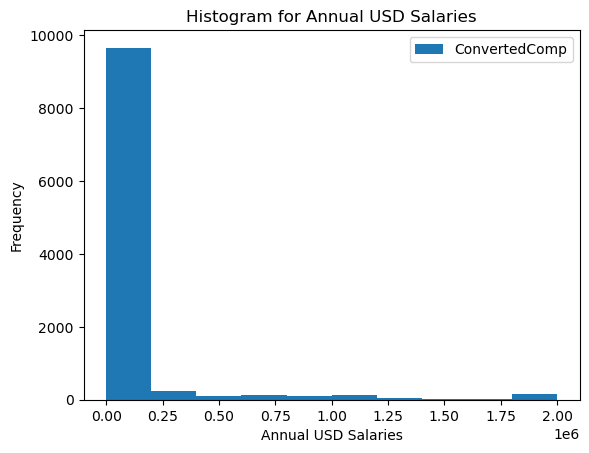

In [3]:
import matplotlib.pyplot as plt

QUERY = """
SELECT ConvertedComp
FROM master
"""

pd.read_sql_query(QUERY, conn).plot(kind='hist')

plt.title('Histogram for Annual USD Salaries')
plt.xlabel('Annual USD Salaries')
plt.ylabel('Frequency')
plt.show()

### Box Plots


Plot a box plot of `Age.`


Text(0.5, 1.0, 'Boxplot for Annual USD Salaries')

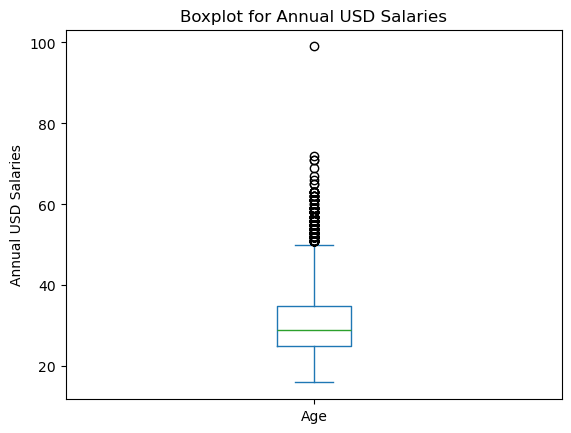

In [23]:

QUERY = """
SELECT Age
FROM master
"""

pd.read_sql_query(QUERY, conn).plot(kind='box')\

plt.ylabel('Annual USD Salaries')
plt.title('Boxplot for Annual USD Salaries')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


Text(0.5, 1.0, 'Scatter plot of Age and Work Week Hours')

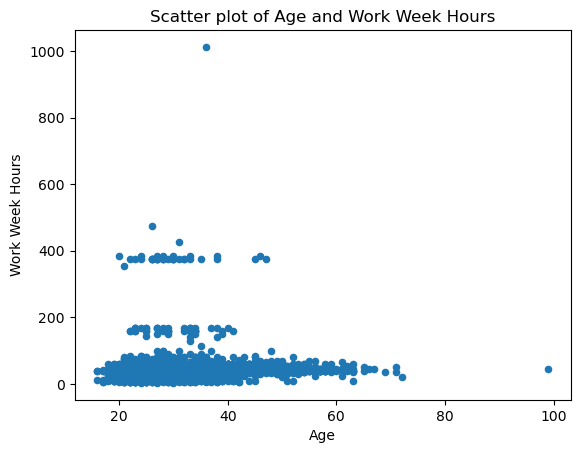

In [30]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

pd.read_sql_query(QUERY, conn).plot(kind='scatter', x='Age', y='WorkWeekHrs')

plt.ylabel("Work Week Hours")
plt.title('Scatter plot of Age and Work Week Hours')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


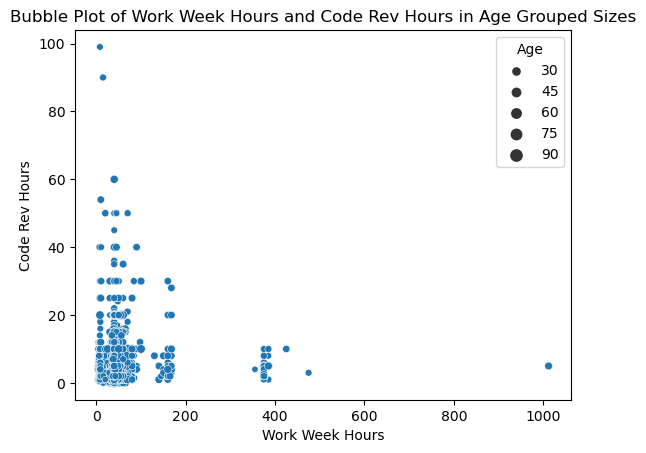

In [4]:
import seaborn as sns

QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""

sns.scatterplot(data=pd.read_sql_query(QUERY, conn), x='WorkWeekHrs', y='CodeRevHrs', size='Age')

plt.xlabel('Work Week Hours')
plt.ylabel('Code Rev Hours')
plt.title('Bubble Plot of Work Week Hours and Code Rev Hours in Age Grouped Sizes')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


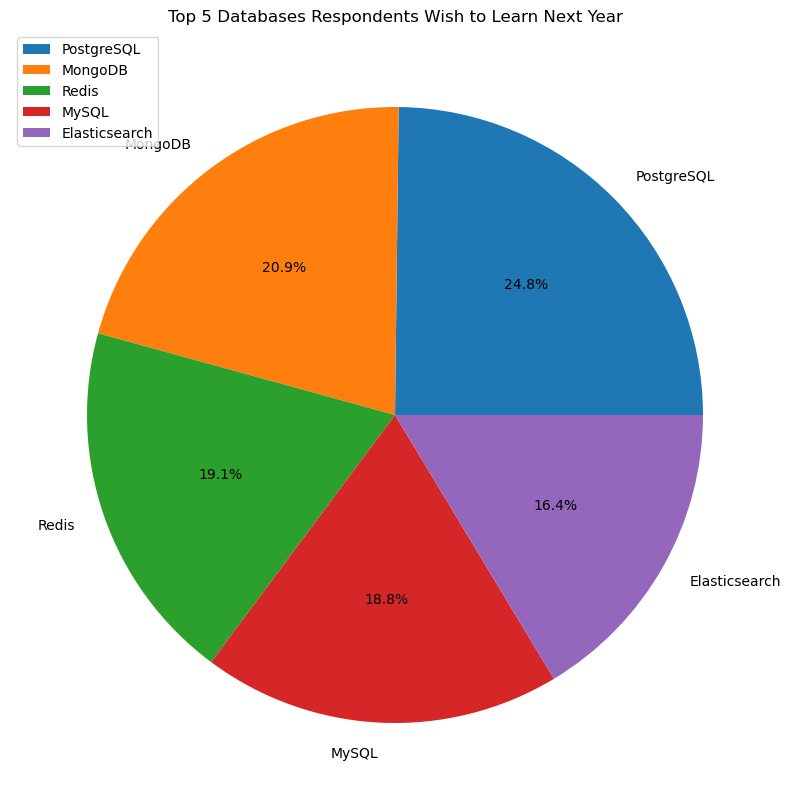

In [6]:
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) AS Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""

df = pd.read_sql_query(QUERY, conn).set_index('DatabaseDesireNextYear')
df['Count'].plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))
    
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.ylabel('')
plt.legend(labels=df.index, loc='upper left')

In [47]:
QUERY = """
SELECT LanguageDesireNextYear, COUNT(*) AS Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""

df = pd.read_sql_query(QUERY, conn)
df.index += 1
df

,LanguageDesireNextYear,Count
1,JavaScript,6630
2,HTML/CSS,5328
3,Python,5239
4,SQL,5012
5,TypeScript,4088


In [21]:
QUERY = """
SELECT LanguageWorkedWith, COUNT(*) AS COUNT
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
HAVING LanguageWorkedWith = 'SQL'
"""

pd.read_sql_query(QUERY, conn)

,LanguageWorkedWith,COUNT
0,SQL,7106


In [48]:
QUERY = """
SELECT DatabaseWorkedWith, COUNT(*)
FROM DatabaseWorkedWith AS tb1
INNER JOIN (
    SELECT Respondent, COUNT(*) AS Count
    FROM DatabaseWorkedWith
    GROUP BY Respondent
) AS tb2
ON tb1.Respondent = tb2.Respondent
WHERE DatabaseWorkedWith = 'MySQL' AND Count = 1
"""

pd.read_sql_query(QUERY, conn)

,DatabaseWorkedWith,COUNT(*)
0,MySQL,474


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


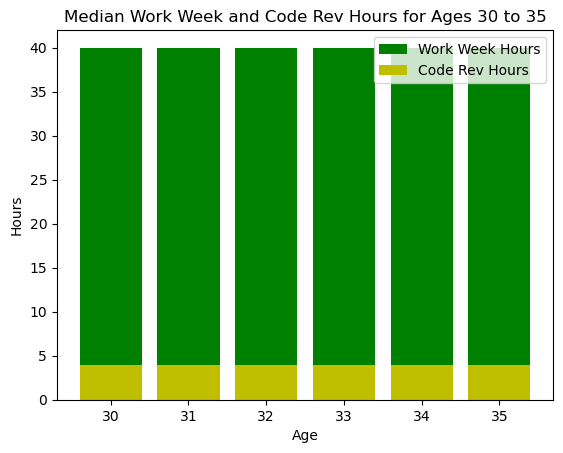

In [93]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age >= 30 AND Age <= 35
"""

df = pd.read_sql_query(QUERY, conn).groupby('Age').median().reset_index()

plt.bar(df['Age'], df['WorkWeekHrs'], color='g')
plt.bar(df['Age'], df['CodeRevHrs'], color='y')
plt.title('Median Work Week and Code Rev Hours for Ages 30 to 35')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.legend(["Work Week Hours", "Code Rev Hours"])
plt.show()

In [13]:
QUERY = """
SELECT DevType, COUNT(*) AS Count
FROM DevType
GROUP BY DevType
ORDER BY Count DESC
"""

pd.read_sql_query(QUERY, conn)

,DevType,Count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


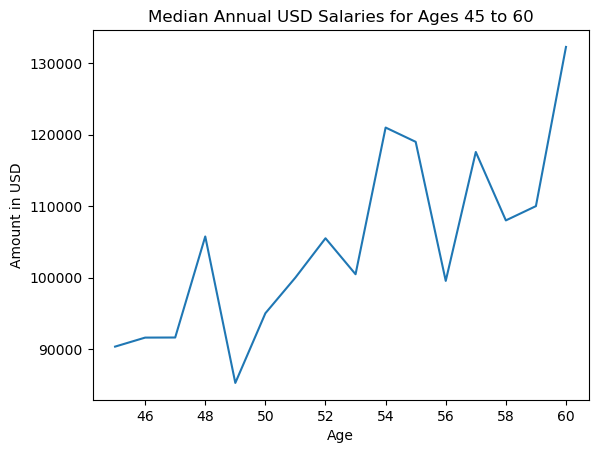

In [6]:
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age >= 45 AND Age <= 60
"""

df = pd.read_sql_query(QUERY, conn).groupby('Age').median().reset_index()
df.plot(kind='line', x='Age', y='ConvertedComp', legend=False)

plt.title('Median Annual USD Salaries for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Amount in USD')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


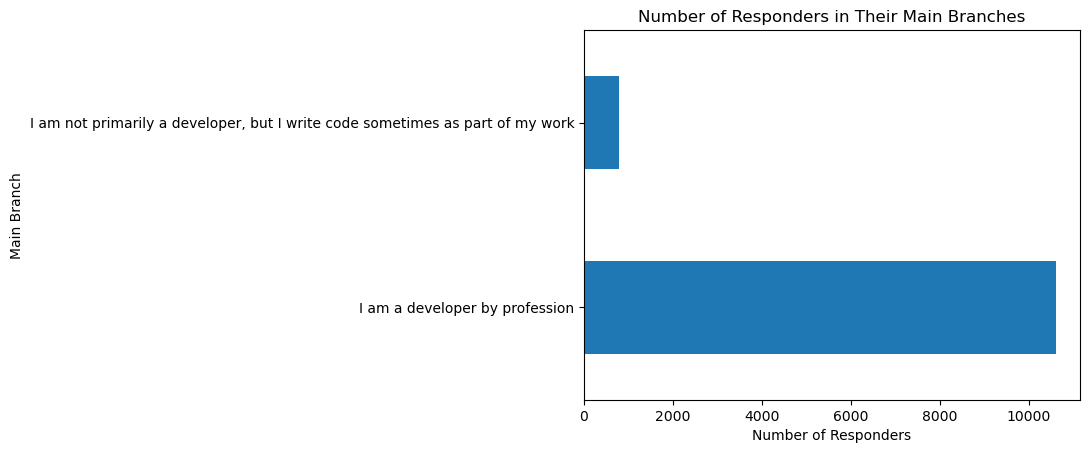

In [119]:
QUERY = """
SELECT MainBranch, COUNT(*) AS Count
FROM master
GROUP BY MainBranch
"""

pd.read_sql_query(QUERY, conn).plot(kind='barh', x='MainBranch', legend=False)

plt.title('Number of Responders in Their Main Branches')
plt.xlabel('Number of Responders')
plt.ylabel('Main Branch')
plt.show()

Close the database connection.


In [120]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
